#### Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Load the dataset 
flight_data = pd.read_csv('flight_data.csv')
flight_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# Check for missing values 
flight_data.isnull().sum()


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [13]:
# Dropping unnecessary columns
flight_data.drop(columns=['Unnamed: 0'], inplace=True)
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
flight_data.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


#### Preparing the data

In [ ]:
features = ['airline', 'stops', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class', 'days_left']
# One-hot encoding categorical variables
X = pd.get_dummies(flight_data[features])
# Storing the column names 
model_columns = X.columns 
print(model_columns)
y = flight_data['price']

Index(['days_left', 'airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara', 'stops_one',
       'stops_two_or_more', 'stops_zero', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai', 'class_Business',
       'class_Economy'],
      dtype='object')


#### Train Test Split

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### Using the RandomForest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=11, random_state=1)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,11
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Predicting 

In [96]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

#### Metrics

In [97]:
from sklearn.metrics import r2_score, mean_absolute_error
print("R^2 Score (for training data):", r2_score(y_train, predictions_train))
print("Mean Absolute Error (for training data):", mean_absolute_error(y_train, predictions_train))
print("R^2 Score (for test data):", r2_score(y_test, predictions_test))
print("Mean Absolute Error (for test data):", mean_absolute_error(y_test, predictions_test))

R^2 Score (for training data): 0.9646246472971284
Mean Absolute Error (for training data): 2333.240422216917
R^2 Score (for test data): 0.9643686553537295
Mean Absolute Error (for test data): 2344.0646416323257


#### Scatter Plot 

In [98]:
min_train_val = min(y_train.min(), predictions_train.min())
max_train_val = max(y_train.max(), predictions_train.max())

min_test_val = min(y_test.min(), predictions_test.min())
max_test_val = max(y_test.max(), predictions_test.max())

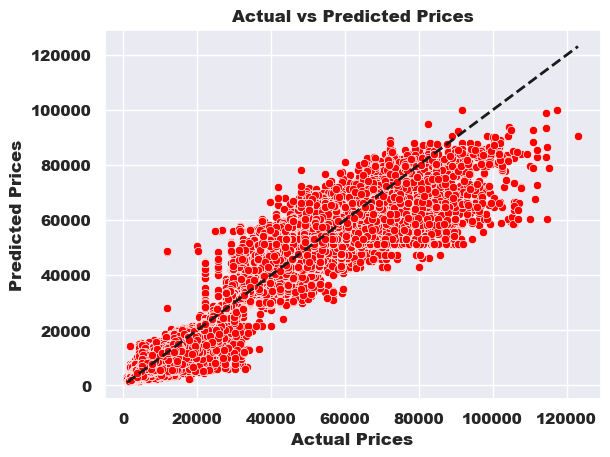

In [99]:
# Scatter plot of actual vs predicted prices on train data
sns.set_theme(style='darkgrid')
sns.set_context("notebook")
sns.scatterplot(x=y_train, y=predictions_train, color='red')
plt.plot([min_train_val, max_train_val], [min_train_val, max_train_val], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices') 
plt.show()

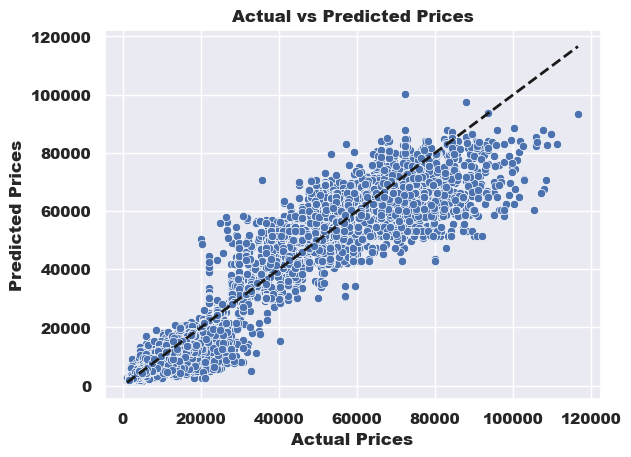

In [100]:
# Scatter plot of actual vs predicted prices on test data
sns.set_theme(style='darkgrid')
sns.set_context("notebook")
sns.scatterplot(x=y_test, y=predictions_test)
plt.plot([min_test_val, max_test_val], [min_test_val, max_test_val], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices') 
plt.show()

#### Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

gs_rf = GridSearchCV(
    estimator=model,
    param_grid={"max_depth": [3, 5, 7, 9, 11]},
    scoring="neg_mean_absolute_error",
    cv=5,
    verbose=1,
    n_jobs=-1,
)

gs_rf.fit(X_train, y_train)
print("Best parameters found: ", gs_rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found:  {'max_depth': 11}


#### Finalise and save model 

In [101]:
import joblib
joblib.dump(model, 'flight_price_model.pkl')
joblib.dump(model_columns, 'flight_price_model_columns.pkl')

['flight_price_model_columns.pkl']